# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import time
import pandas as pd
from IPython.display import display

In [2]:
np.random.seed(42)

# Loading The Dataset

In [3]:
digits = load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature dimension: {X.shape[1]}")

Dataset shape: (1797, 64)
Number of classes: 10
Feature dimension: 64


# Display Some Sample Images

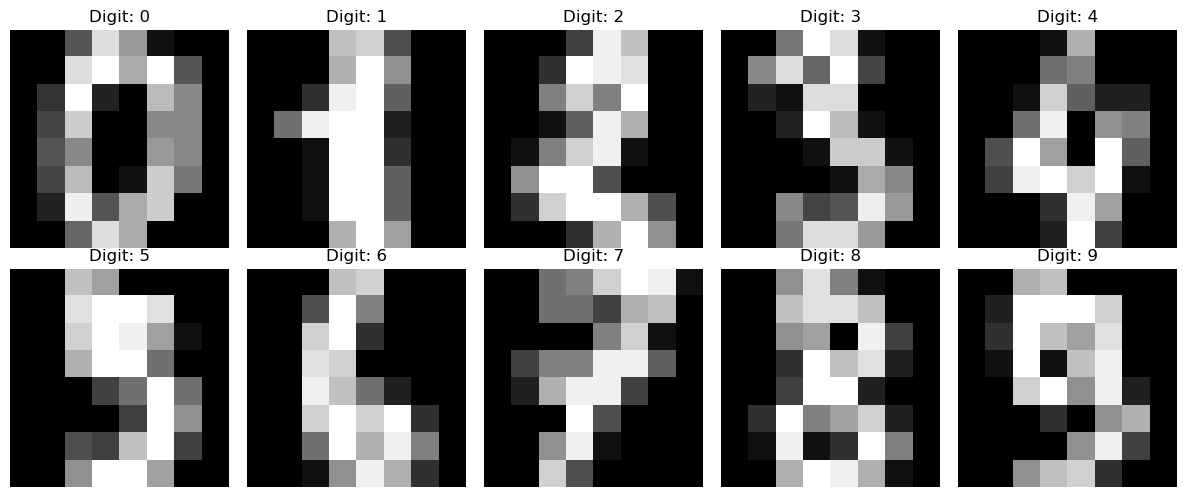

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Splitting The Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1257
Test set size: 540


# Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original data - Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(f"Scaled data - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")

Original data - Mean: 4.89, Std: 6.01
Scaled data - Mean: 0.00, Std: 0.97


# Model Training and Evaluation

In [7]:
def evaluate_svm_model(kernel, X_train, X_test, y_train, y_test, **params):
    model = SVC(kernel=kernel, random_state=42, **params)
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'training_time': training_time,
        'predictions': y_pred
    }

SVM with Linear Kernel

In [8]:
linear_results = evaluate_svm_model('linear', X_train_scaled, X_test_scaled, y_train, y_test)

print("Linear Kernel Results:")
print(f"Accuracy: {linear_results['accuracy']:.4f}")
print(f"F1-Score (macro): {linear_results['f1_score']:.4f}")
print(f"Training Time: {linear_results['training_time']:.4f} seconds")

Linear Kernel Results:
Accuracy: 0.9796
F1-Score (macro): 0.9795
Training Time: 0.0660 seconds


SVM with RBF Kernel - Different C Values

In [9]:
c_values = [0.1, 1, 10, 100]
rbf_results = {}

for c in c_values:
    print(f"\nTraining RBF SVM with C={c}")
    results = evaluate_svm_model('rbf', X_train_scaled, X_test_scaled, y_train, y_test, C=c)
    rbf_results[c] = results
    print(f"Accuracy: {results['accuracy']:.4f}, Training Time: {results['training_time']:.4f}s")


Training RBF SVM with C=0.1
Accuracy: 0.9315, Training Time: 1.5555s

Training RBF SVM with C=1
Accuracy: 0.9833, Training Time: 0.1499s

Training RBF SVM with C=10
Accuracy: 0.9815, Training Time: 0.1429s

Training RBF SVM with C=100
Accuracy: 0.9815, Training Time: 0.2609s


Impact of Gamma Hyperparameter

In [10]:
gamma_values = [0.001, 0.01, 0.1, 1]
gamma_results = {}

for gamma in gamma_values:
    print(f"\nTraining RBF SVM with gamma={gamma}")
    results = evaluate_svm_model('rbf', X_train_scaled, X_test_scaled, y_train, y_test, C=1, gamma=gamma)
    gamma_results[gamma] = results
    print(f"Accuracy: {results['accuracy']:.4f}, Training Time: {results['training_time']:.4f}s")


Training RBF SVM with gamma=0.001
Accuracy: 0.9463, Training Time: 0.3143s

Training RBF SVM with gamma=0.01
Accuracy: 0.9815, Training Time: 0.1270s

Training RBF SVM with gamma=0.1
Accuracy: 0.9278, Training Time: 0.9315s

Training RBF SVM with gamma=1
Accuracy: 0.1296, Training Time: 0.9929s


SVM with Polynomial Kernel

In [11]:
poly_results = {}

for degree in [2, 3]:
    print(f"\nTraining Polynomial SVM with degree={degree}")
    results = evaluate_svm_model('poly', X_train_scaled, X_test_scaled, y_train, y_test, degree=degree)
    poly_results[degree] = results
    print(f"Accuracy: {results['accuracy']:.4f}, Training Time: {results['training_time']:.4f}s")


Training Polynomial SVM with degree=2
Accuracy: 0.9796, Training Time: 0.3538s

Training Polynomial SVM with degree=3
Accuracy: 0.9667, Training Time: 0.3528s


# Comprehensive Results Analysis

In [12]:
results_summary = []

# linear kernel results
results_summary.append({
    'Kernel': 'Linear',
    'C': 'default (1)',
    'Gamma': 'default (scale)',
    'Degree': '-',
    'Accuracy': linear_results['accuracy'],
    'F1-Score': linear_results['f1_score'],
    'Training Time (s)': linear_results['training_time']
})

# RBF kernel with different C values
for c, result in rbf_results.items():
    results_summary.append({
        'Kernel': 'RBF',
        'C': c,
        'Gamma': 'default (scale)',
        'Degree': '-',
        'Accuracy': result['accuracy'],
        'F1-Score': result['f1_score'],
        'Training Time (s)': result['training_time']
    })

# RBF kernel with different gamma values
for gamma, result in gamma_results.items():
    results_summary.append({
        'Kernel': 'RBF',
        'C': 1,
        'Gamma': gamma,
        'Degree': '-',
        'Accuracy': result['accuracy'],
        'F1-Score': result['f1_score'],
        'Training Time (s)': result['training_time']
    })

# polynomial kernel results
for degree, result in poly_results.items():
    results_summary.append({
        'Kernel': 'Polynomial',
        'C': 'default (1)',
        'Gamma': 'default (scale)',
        'Degree': degree,
        'Accuracy': result['accuracy'],
        'F1-Score': result['f1_score'],
        'Training Time (s)': result['training_time']
    })

results_df = pd.DataFrame(results_summary)
display(results_df)

,Kernel,C,Gamma,Degree,Accuracy,F1-Score,Training Time (s)
0,Linear,default (1),default (scale),-,0.979630,0.979472,0.065962
1,RBF,0.1,default (scale),-,0.931481,0.931561,1.555502
2,RBF,1,default (scale),-,0.983333,0.983281,0.149913
3,RBF,10,default (scale),-,0.981481,0.981383,0.142918
4,RBF,100,default (scale),-,0.981481,0.981383,0.260855
5,RBF,1,0.001,-,0.946296,0.946095,0.314341
6,RBF,1,0.01,-,0.981481,0.981379,0.126984
7,RBF,1,0.1,-,0.927778,0.932847,0.931470
8,RBF,1,1,-,0.129630,0.066462,0.992944
9,Polynomial,default (1),default (scale),2,0.979630,0.979652,0.353797


# Visualization of Results

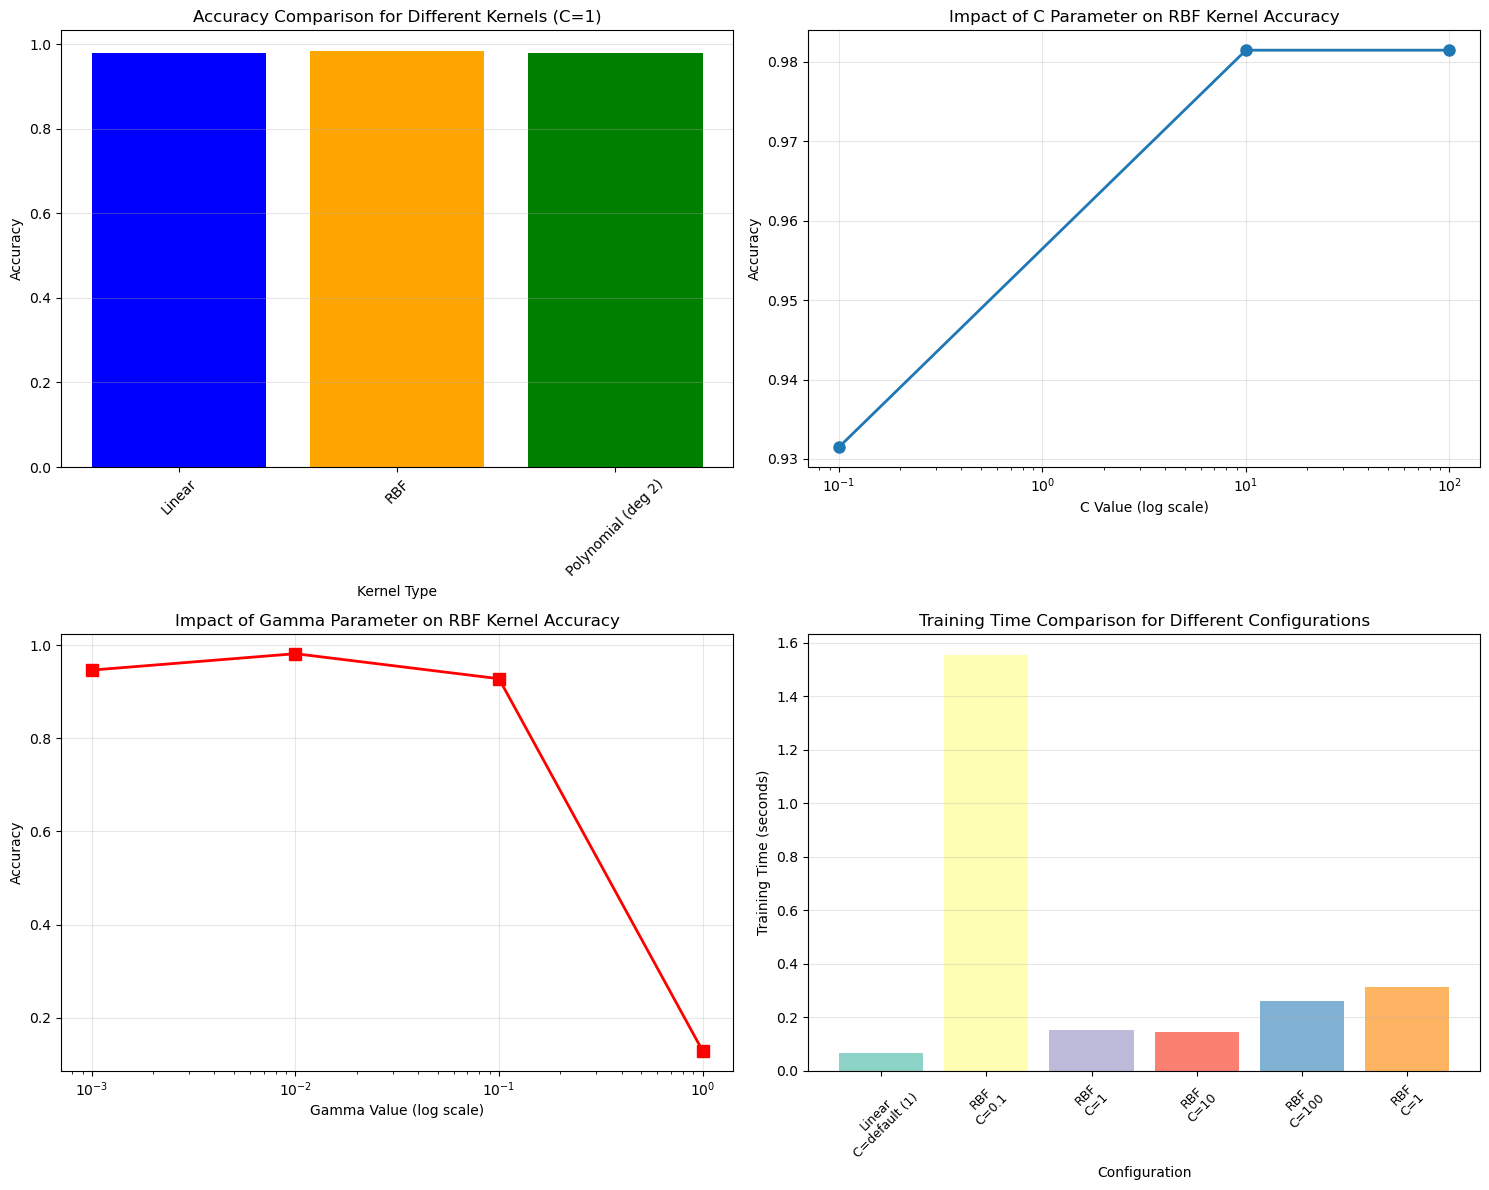

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy Comparison
kernels_compare = results_df[results_df['C'].isin(['default (1)', 1]) & 
                             (results_df['Gamma'] == 'default (scale)') &
                             (results_df['Degree'].isin(['-', 2]))]
axes[0, 0].bar(range(len(kernels_compare)), kernels_compare['Accuracy'], color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Accuracy Comparison for Different Kernels (C=1)')
axes[0, 0].set_xlabel('Kernel Type')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticks(range(len(kernels_compare)))
axes[0, 0].set_xticklabels([f"{row['Kernel']}" + (f" (deg {row['Degree']})" if row['Degree'] != '-' else '') 
                           for _, row in kernels_compare.iterrows()], rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Impact of C Parameter on RBF Kernel
c_impact = results_df[(results_df['Kernel'] == 'RBF') & (results_df['Gamma'] == 'default (scale)') & 
                      (results_df['C'] != 1) | (results_df['C'] == 'default (1)')]
c_impact = c_impact[c_impact['C'] != 'default (1)']  # Remove the default entry

axes[0, 1].plot(c_impact['C'].astype(float), c_impact['Accuracy'], marker='o', linewidth=2, markersize=8)
axes[0, 1].set_title('Impact of C Parameter on RBF Kernel Accuracy')
axes[0, 1].set_xlabel('C Value (log scale)')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_xscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Impact of Gamma Parameter on RBF Kernel
gamma_impact = results_df[(results_df['Kernel'] == 'RBF') & (results_df['C'] == 1) & 
                          (results_df['Gamma'] != 'default (scale)')]

axes[1, 0].plot(gamma_impact['Gamma'].astype(float), gamma_impact['Accuracy'], marker='s', linewidth=2, markersize=8, color='red')
axes[1, 0].set_title('Impact of Gamma Parameter on RBF Kernel Accuracy')
axes[1, 0].set_xlabel('Gamma Value (log scale)')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Training Time Comparison - First 6 Configurations for Clarity
time_compare = results_df.head(6) 

axes[1, 1].bar(range(len(time_compare)), time_compare['Training Time (s)'], 
               color=plt.cm.Set3(range(len(time_compare))))
axes[1, 1].set_title('Training Time Comparison for Different Configurations')
axes[1, 1].set_xlabel('Configuration')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_xticks(range(len(time_compare)))
axes[1, 1].set_xticklabels([f"{row['Kernel']}\nC={row['C']}" for _, row in time_compare.iterrows()], 
                           rotation=45, fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed Analysis of Best Model

In [14]:
best_model_idx = results_df['Accuracy'].idxmax()
best_model_info = results_df.loc[best_model_idx]

print(f"Kernel: {best_model_info['Kernel']}")
print(f"C: {best_model_info['C']}")
print(f"Gamma: {best_model_info['Gamma']}")
print(f"Degree: {best_model_info['Degree']}")
print(f"Accuracy: {best_model_info['Accuracy']:.4f}")
print(f"F1-Score: {best_model_info['F1-Score']:.4f}")
print(f"Training Time: {best_model_info['Training Time (s)']:.4f} seconds")

Kernel: RBF
C: 1
Gamma: default (scale)
Degree: -
Accuracy: 0.9833
F1-Score: 0.9833
Training Time: 0.1499 seconds


# Confusion Matrix for Best Model

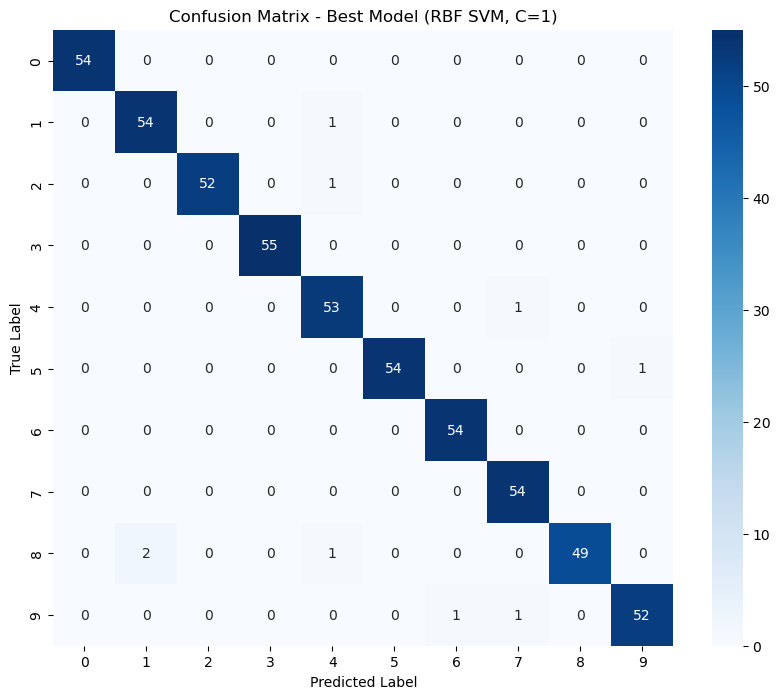

In [15]:
best_model_results = rbf_results[best_model_info['C']]  

cm = confusion_matrix(y_test, best_model_results['predictions'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title(f'Confusion Matrix - Best Model (RBF SVM, C={best_model_info['C']})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report for The Best Model

In [16]:
print(f"Best Model (RBF SVM, C={best_model_info['C']}):")
print(classification_report(y_test, best_model_results['predictions']))

Best Model (RBF SVM, C=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.94      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Impact of Feature Scaling

In [17]:
linear_no_scale = evaluate_svm_model('linear', X_train, X_test, y_train, y_test)
rbf_no_scale = evaluate_svm_model('rbf', X_train, X_test, y_train, y_test, C=1)

linear_with_scale = linear_results
rbf_with_scale = rbf_results[1]

scaling_comparison = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF SVM'],
    'Accuracy (No Scaling)': [linear_no_scale['accuracy'], rbf_no_scale['accuracy']],
    'Accuracy (With Scaling)': [linear_with_scale['accuracy'], rbf_with_scale['accuracy']],
    'Improvement': [linear_with_scale['accuracy'] - linear_no_scale['accuracy'], 
                   rbf_with_scale['accuracy'] - rbf_no_scale['accuracy']]
})

display(scaling_comparison)

,Model,Accuracy (No Scaling),Accuracy (With Scaling),Improvement
0,Linear SVM,0.975926,0.979630,0.003704
1,RBF SVM,0.988889,0.983333,-0.005556
